# Final - Individual Project: Data Analysis and Modeling
### Ethan DeMelo
23 July, 2024

### Outline
<b>Questions: </b>The goal is to understand which type of highways are safest based on data from highways in Minnesota in 1973<br>
<b>Model Type: </b>Classification<br>
<b>Expected Results: </b>Accurately predict the highway type based on other attributes provided <br>

<b><u>Dataset:</u></b><br>
<b>URL</b> https://vincentarelbundock.github.io/Rdatasets/doc/carData/Highway1.html -|- https://vincentarelbundock.github.io/Rdatasets/csv/carData/Highway1.csv -|- https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Datasets/Highway/Highway1.csv<br>
<b>Name:</b> Highway Accidents<br>
<b>Description:</b> The data comes from a unpublished master's paper by Carl Hoffstedt. They relate the automobile accident rate, in accidents per million vehicle miles to several potential terms. The data include 39 sections of large highways in the state of Minnesota in 1973. The goal of this analysis was to understand the impact of design variables, Acpts, Slim, Sig, and Shld that are under the control of the highway department, on accidents.<br>
<b>Rows: </b>39<br>
<b>Columns: </b>13<br>
<b>Target Label: </b>htype; Predict the proper highway type based on other attribute labels<br>
<b>Numerical/Categorical: </b>The variables are mostly numerical<br>

<p>
The remainder of this paper will discuss the different types of classification models accuracies, determine which is best for our specific use case, and how we achieved this outcome. It will  include things such as the cleanup of dirty and missing data, give some visualizations, and some summaries throughout the paper
</p>

In [27]:
# set up
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 #Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Datasets/Highway/Highway1.csv")
df = df.drop(['rownames'],axis=1) # Remove unnecessary rownames row
df.head()

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid,htype
0,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
1,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
2,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
3,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
4,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI


The htype column needs to be converted to a numerical value. Here are the conversion values:
<ul>
<li>MC  - 0
<li>FAI - 1
<li>PA  - 2
<li>MA  - 3
</ul>

In [29]:
df['htype'] = df['htype'].str.strip().replace('MC', '0')
df['htype'] = df['htype'].str.strip().replace('FAI', '1')
df['htype'] = df['htype'].str.strip().replace('PA', '2')
df['htype'] = df['htype'].str.strip().replace('MA', '3')

In [30]:
# Check for missing values
df.isnull().sum()

rate     0
len      0
adt      0
trks     0
sigs1    0
slim     0
shld     0
lane     0
acpt     0
itg      0
lwid     0
htype    0
dtype: int64

### Basic Summary / Statistics

<Axes: ylabel='Frequency'>

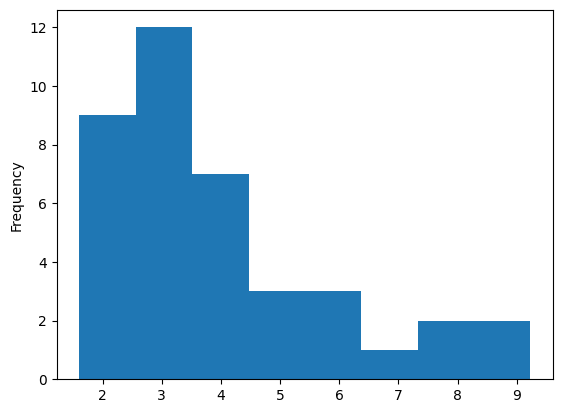

In [31]:
df['rate'].plot.hist(bins=8)

Here with a histogram, we can see the sine-wave like curve of the rate of accidents per million vehicle miles

<Axes: ylabel='Density'>

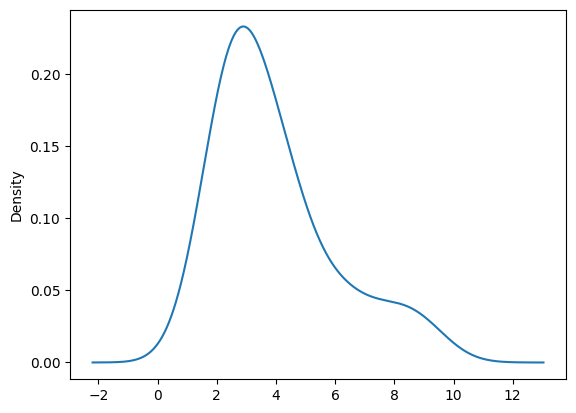

In [32]:
df['rate'].plot.kde()

Here's a density plot. This shows the natural curve of the data in a more continuous format

<Axes: xlabel='htype'>

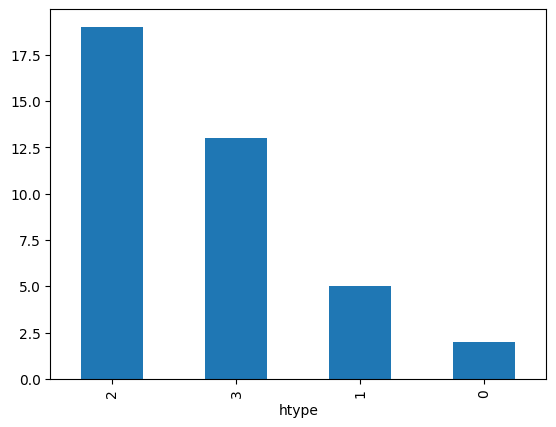

In [33]:
df['htype'].value_counts().plot.bar()

Here we can the values of each of the highway types and how frequently they appear in the data

<Axes: ylabel='count'>

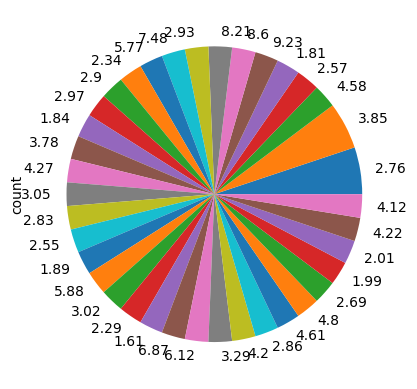

In [34]:
plot_series = df['rate']
plot_series.name = ''
plot_series.value_counts().plot.pie()

Here we can see a pie chart of the amount of each rate of highway incidents in the data. We can see it's spread equally throughout the data

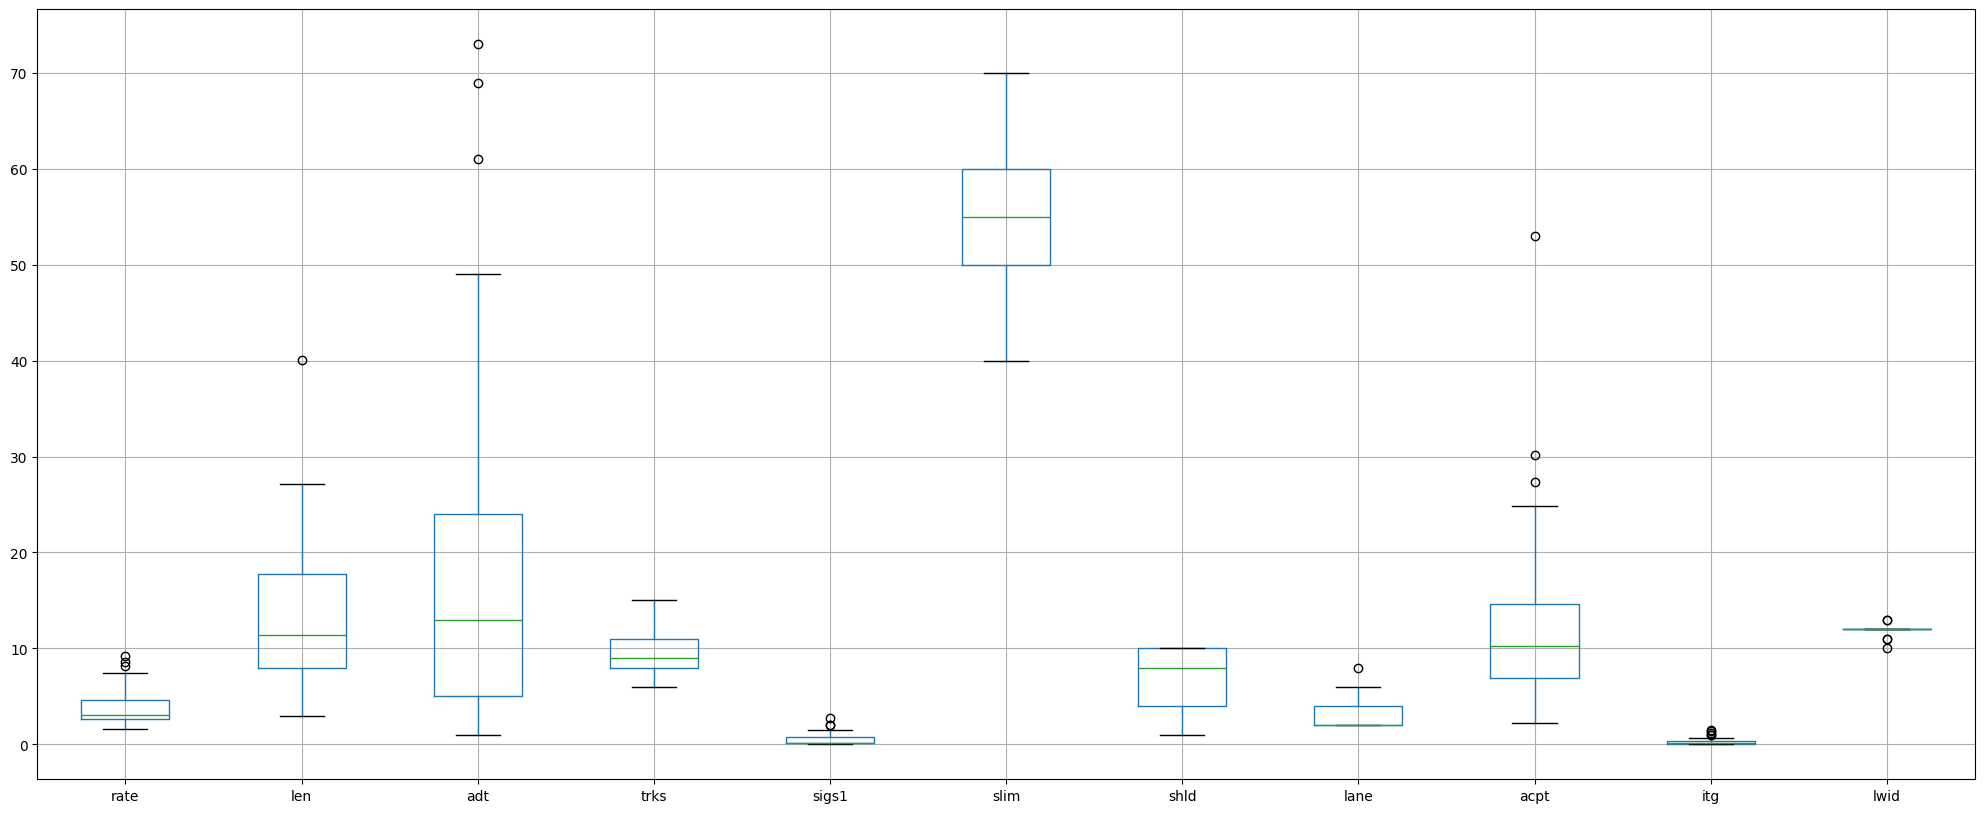

In [35]:
df.boxplot(figsize=(25,10))
plt.show()

This boxplot shows each of the attributes in the data and how it's values are distributed for each. 

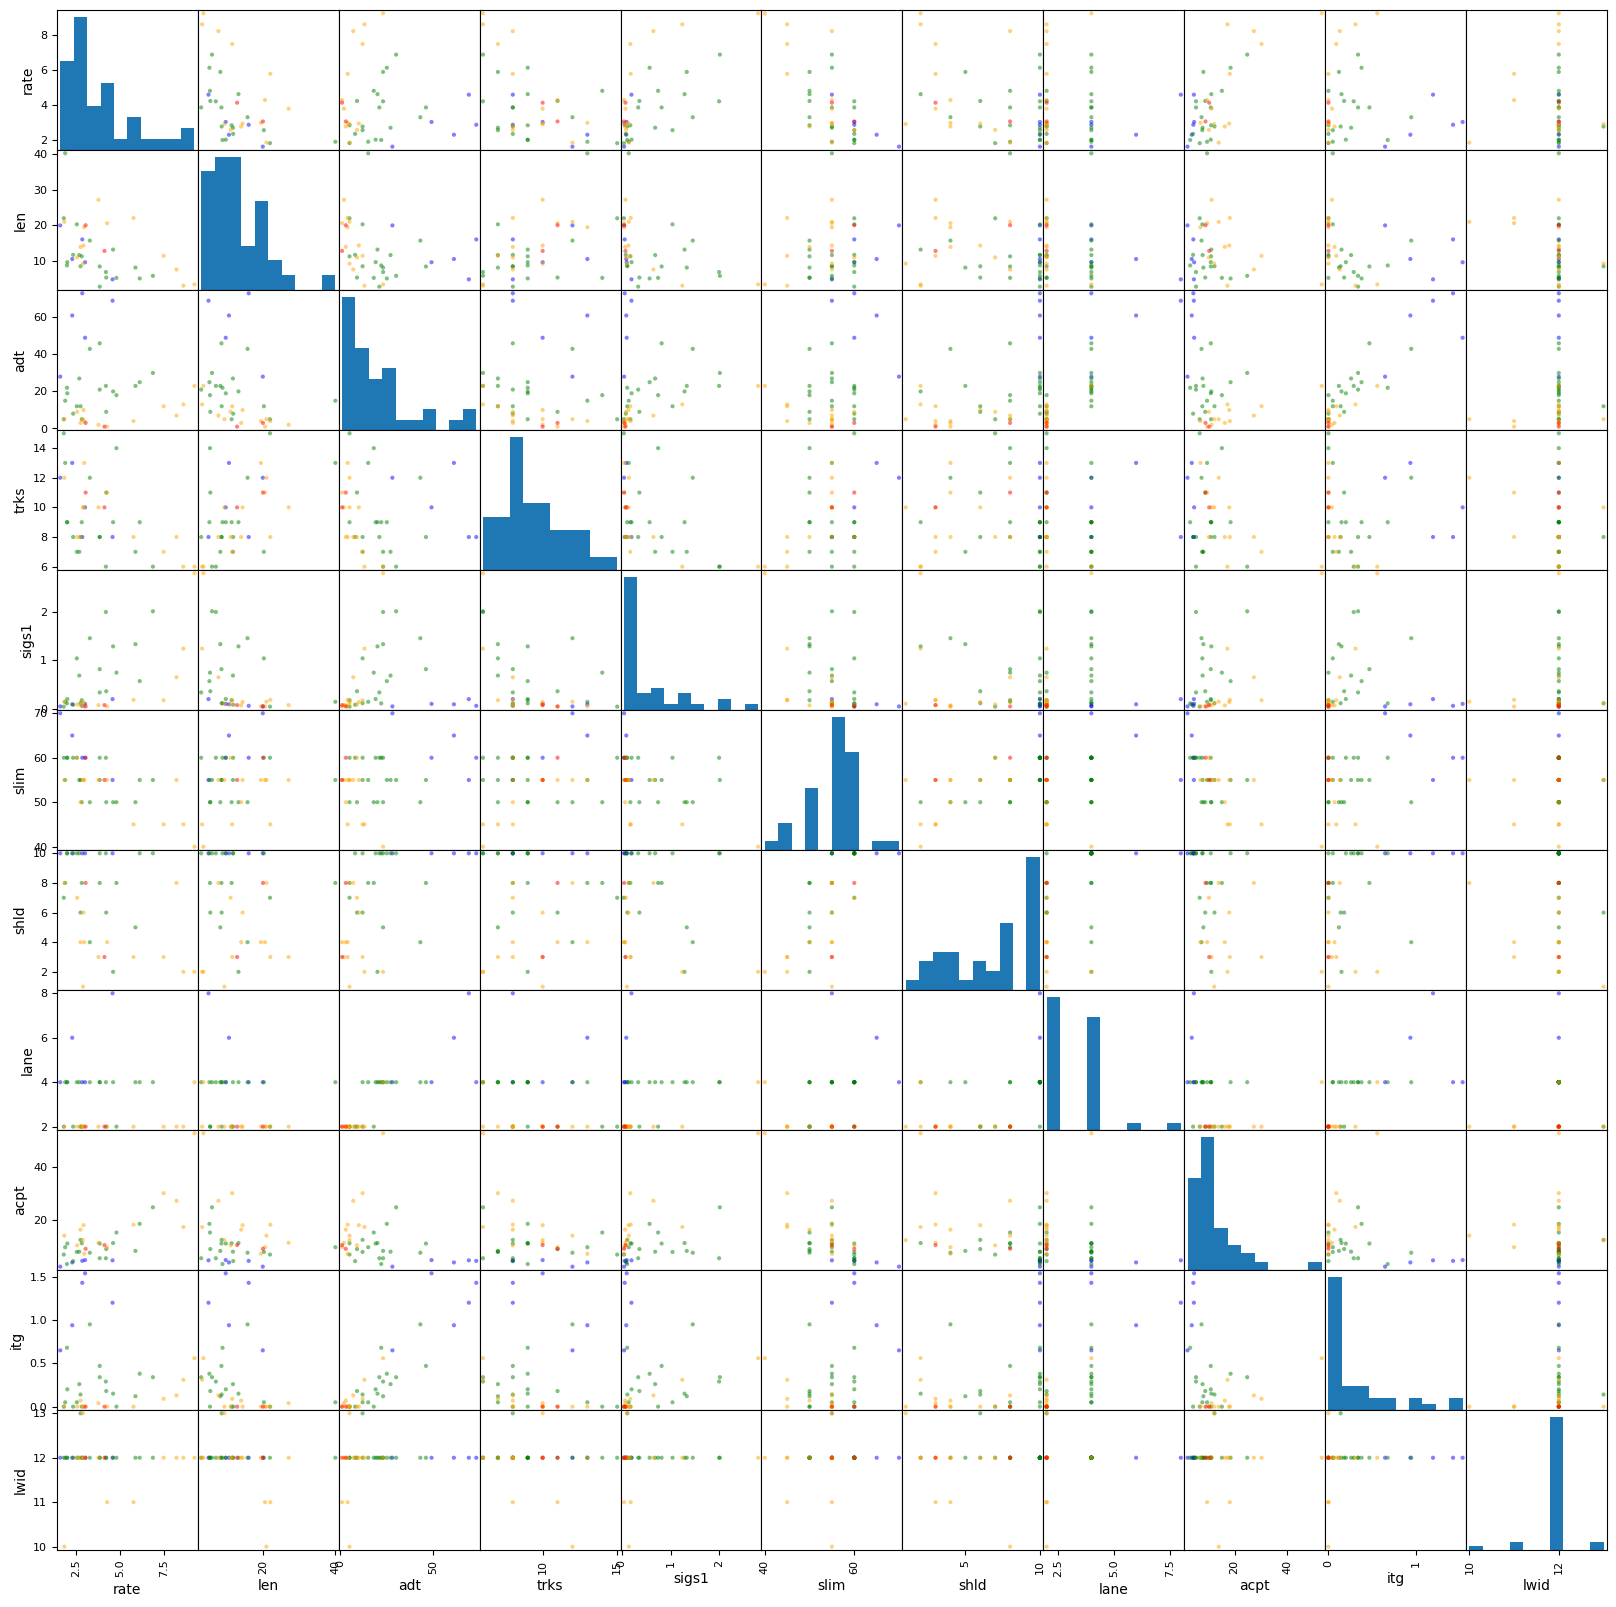

In [36]:
def fn_color(x):
  if x == '0':
    return 'red'
  elif x == '1':
    return 'blue'
  elif x == '2':
    return 'green'
  else:
    return 'orange'
  
color_vector = df['htype'].map(fn_color)

null = pd.plotting.scatter_matrix(df, figsize=[20,20], c=color_vector)

Here we can see a scatter matrix to view all pairwise relationships

After taking a look at all of the visualizations, we can see a clear imbalance in the adt and actp attributes. Both have very wide ranges and many outliers

### Methods and Analysis

In [37]:
X  = df.drop(['htype'],axis=1)
y = df['htype']

model = SVC(kernel='linear', C=0.001, max_iter=10000)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.88 0.88 0.88 0.88 0.57]
Accuracy: 0.81


d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Here we can see with a linear model, using 5-fold cross validation the model accuracy is 81%

In [38]:
X  = df.drop(['htype'],axis=1)
y = df['htype']

model = SVC(kernel='rbf', gamma='scale')

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.75 0.88 0.75 0.62 0.71]
Accuracy: 0.74


d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Here using the rbf model, we see that the accuracy is slightly worse at 74% when using 5-fold cross validation

In [39]:
model = SVC(kernel='sigmoid', gamma='scale', coef0=0.8)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.50 0.50 0.50 0.50 0.43]
Accuracy: 0.49


d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Here we see that the sigmoid model is even worse at a 49% accuracy when using 5-fold cross validation. Out of all of the models used here, the linear model is by far the most accurate at 81% accuracy.

In [40]:
# Rseset model to linear kernel type
model = SVC(kernel='linear', C=0.001, max_iter=10000)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)


# Determine 95% confidence-interval
import scipy.stats as stats

# Calculate mean accuracy and standard error
mean_accuracy = np.mean(scores)
standard_error = stats.sem(scores)

# Compute 95% confidence interval
confidence_interval = stats.t.interval(0.95, 
                                       len(scores)-1, 
                                       loc=mean_accuracy, 
                                       scale=standard_error)
print("Confidence interval: {}".format(confidence_interval))


Confidence interval: (0.645715832898705, 0.9828555956727235)


d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


### k-NN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from confint import classification_confint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Retrieve data
df = pd.read_csv("https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Datasets/Highway/Highway1.csv")
df = df.drop(['rownames'],axis=1) # Remove unnecessary rownames row
df.head()

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid,htype
0,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
1,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
2,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
3,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
4,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI


In [42]:
df['htype'] = df['htype'].str.strip().replace('MC', '0')
df['htype'] = df['htype'].str.strip().replace('FAI', '1')
df['htype'] = df['htype'].str.strip().replace('PA', '2')
df['htype'] = df['htype'].str.strip().replace('MA', '3')

In [43]:
X  = df.drop(['htype'],axis=1)
actual_y = df['htype']

In [44]:
# some basic data stats
print("Shape: {}".format(df.shape))
print("Value Counts on the 'Diagnosis' Field:")
print(df['htype'].value_counts())

Shape: (39, 12)
Value Counts on the 'Diagnosis' Field:
htype
2    19
3    13
1     5
0     2
Name: count, dtype: int64


In [45]:
# KNN
model = KNeighborsClassifier()

In [46]:
# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Grid Search: best parameters: {'n_neighbors': 7}


In [47]:
# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Accuracy: 0.82 (0.70,0.94)


<p>
Here using the k-NN classifier model, we get an accuracy of 82%. compared to the linear SVC model, this is one percent higher
</p>

In [48]:
# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)


# Determine 95% confidence-interval
import scipy.stats as stats

# Calculate mean accuracy and standard error
mean_accuracy = np.mean(scores)
standard_error = stats.sem(scores)

# Compute 95% confidence interval
confidence_interval = stats.t.interval(0.95, 
                                       len(scores)-1, 
                                       loc=mean_accuracy, 
                                       scale=standard_error)
print("Confidence interval: {}".format(confidence_interval))

Confidence interval: (0.422016541699458, 0.9565548868719705)


d:\Program Files (x86)\Python\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Here we can see using a 5-fold cross validation, it has a confidence interval of 42.2% to 95.66%

### Results

When comparing the linear SVC model to the k-NN classifier model, that the overall accuracies are comparable, with the SVC being 81% accuracy and the k-NN model being 82%. With just this information one would think to choose k-NN model because of its higher accuracy, however you have to take into consideration the confidence interval. The SVC model has a confidence interval of 64.57% 98.29%. The k-NN model has a confidence interval of 42.2% to 95.66%. Here we see both the lowest and the highest values are lower than the SVC model, and when outlier accuracies matter, I would choose to pick the SVC model.